In [2]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 주피터 노트북과 유사한 환경을 제공

# 환경설정

-  colab : 코드 작성,라이브터리 연동,GPU활용
-  구글 드라이브 : 데이터 가져오거나 저장


- 코랩에서 구글 드라이브에 있는 파일 접근
  - 왼쪽은 아이콘 클릭
    - 상단의 아이콘 클릭

(-0.5, 221.5, 299.5, -0.5)

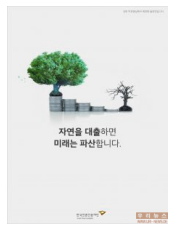

In [ ]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Deep_Learning/lecture_image/nature.png")
plt.imshow(img)
plt.axis("off")

In [ ]:
import pandas as pd

bmi = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_Learning/data/bmi_500.csv")

bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


# GPU 체크하기

In [ ]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()





[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 845650502090496718
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 608931148017866520
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
# 현재 할당된 것이 CPU인지 GPU인지 확인
import tensorflow as tf

tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# 현재 할당된 GPU를 실행
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpus = tf.config.experimental.list_physical_devices("GPU")

if gpus :
  try :
    # 메모리를 GPU 메모리를 사용
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as re :
    print(re)

In [ ]:
# GPU 메모리를 전부 할당하지 않고 필요에 따라 자동으로 할당하도록 설정
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)


In [ ]:
!pip freeze

absl-py==1.2.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.1
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.4
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.8
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.6.15
cffi==1.15.1
cftime==1.6.1
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.7
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cupy-cuda111==9.4.0
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.6
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==1.0.0
decorator==4.

# Keras 프레임워크

- Sequential() : 신경망(퍼셉트론으로 구성되어 있는 것, 뉴런으로 구성되어 있는 것)을 생성
- Dense() : 신경망에 퍼셉트론 층을 설정
  - units : 현재의 층의 퍼셉트론의 수 (출력의 수)
  - input_dim : 입력의 수(입력되는 데이터의 특성의 수)
- Activation() : 활성화 함수를 설정
- add() : Dense()나 Activation() 등을 신경망에 추가

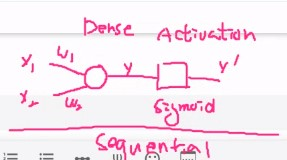
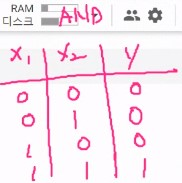

- units : 1 (출력의 값 : 1 (1개))
- input_dim : 2 (입력 값 : x1, x2 (2개))

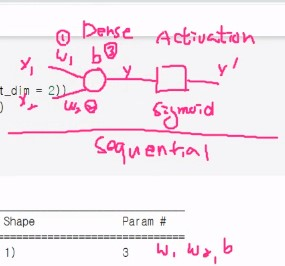

- 특성 수 : 3 (w1, w2, b)

# AND 논리 학습하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model1 = Sequential()

model1.add(Dense(units = 1, input_dim = 2))
model1.add(Activation("sigmoid"))

# 생성된 신경망의 구조를 출력
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# 데이터 정의

In [ ]:
import pandas as pd
import numpy as np

X_AND = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_AND = [0, 0, 0, 1]

# 파라미터 (w, b)들의 초기값의 시드를 설정

- 일반적으로 신경망을 생성하면 파라미터(가중치: w, b) 값을 랜덤으로 초기화
- 항상 동일한 초기값을 설정되도록 시드를 설정

In [ ]:
import tensorflow as tf

seed = 0

np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# 작성한 신경망을 학습할 수 있도록 컴파일
# - loss : 사용할 손실 함수 (비용 함수)
#   - 회귀 : mse(mean_squared_error)
#   - 이진분류 : binary_corssentropy
#   - 다진 분류 : categorical_crossentropy
# - optimizer : 최적화 함수 (경사하강법의 종류)
#   - adam
# - metrics : 평가도구 (정확도 또는 오차)
#   - 회귀 : 표기하지 않음
#   - 분류 : accuracy(acc라고 써도 되는데 오류 뜨는 경우가 있어서 accuracy라고 씀)

model1.compile(loss="binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])


In [ ]:
# 학습
# batch_size : 한 번 반복할 때, 몇 개 데이터를 사용할 것인지 설정
# epochs : 몇 번 반복할 것인지 설정 (w, b를 몇 번 업데이트 할 것인지 설정)
h1 = model1.fit(X_AND, y_AND, batch_size = 4, epochs = 8000) # 여러번 돌릴수록 loss가 낮아짐

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 10ms/step - loss: 0.0815 - accuracy: 1.0000
Epoch 5502/8000
1/1 [==============================] - 0s 9ms/step - loss: 0.0815 - accuracy: 1.0000
Epoch 5503/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0815 - accuracy: 1.0000
Epoch 5504/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5505/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5506/8000
1/1 [==============================] - 0s 9ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5507/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5508/8000
1/1 [==============================] - 0s 9ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5509/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0813 - accuracy: 1.0000
Epoch 5510/8000
1/1 [==============================] - 0s 11ms/st

# 예측

In [ ]:
X_new = [[1, 0], [1, 1], [0, 0], [0, 1]]
y_new = [0, 1, 0, 0]

pred = model1.predict(X_new)
pred

array([[5.8462348e-02],
       [9.4065017e-01],
       [2.2716529e-04],
       [5.4818332e-02]], dtype=float32)

# XOR논리 학습하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model2 = Sequential()

model2.add(Dense(units = 1, input_dim = 2))
model2.add(Activation("sigmoid"))

# 생성된 신경망의 구조를 출력
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
 activation_4 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# 데이터 정의

In [ ]:
import pandas as pd
import numpy as np

X_XOR = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_XOR = [0, 1, 1, 0]

# 파라미터 (w, b)들의 초기값의 시드를 설정

- 일반적으로 신경망을 생성하면 파라미터(가중치: w, b) 값을 랜덤으로 초기화
- 항상 동일한 초기값을 설정되도록 시드를 설정

In [ ]:
import tensorflow as tf

seed = 0

np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# 작성한 신경망을 학습할 수 있도록 컴파일
# - loss : 사용할 손실 함수 (비용 함수)
#   - 회귀 : mse(mean_squared_error)
#   - 이진분류 : binary_corssentropy
#   - 다진 분류 : categorical_crossentropy
# - optimizer : 최적화 함수 (경사하강법의 종류)
#   - adam
# - metrics : 평가도구 (정확도 또는 오차)
#   - 회귀 : 표기하지 않음
#   - 분류 : accuracy(acc라고 써도 되는데 오류 뜨는 경우가 있어서 accuracy라고 씀)

model2.compile(loss="binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])


In [ ]:
# 학습
# batch_size : 한 번 반복할 때, 몇 개 데이터를 사용할 것인지 설정
# epochs : 몇 번 반복할 것인지 설정 (w, b를 몇 번 업데이트 할 것인지 설정)
h1 = model2.fit(X_XOR, y_XOR, batch_size = 4, epochs = 4000) # 여러번 돌릴수록 loss가 낮아짐

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 15ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1502/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1503/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1504/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1505/4000
1/1 [==============================] - 0s 9ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1506/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1507/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1508/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1509/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1510/4000
1/1 [==============================] - 0s 16ms/

# 예측

In [ ]:
X_new = [[1, 0], [1, 1], [0, 0], [0, 1]]
y_new = [1, 0, 0, 1]

pred = model2.predict(X_new)
pred

array([[0.50001836],
       [0.49996126],
       [0.5000583 ],
       [0.50000113]], dtype=float32)

# MLP 만들기


- 퍼셉트론 2개로 신경망 구성하기


In [ ]:
model3 = Sequential()

model3.add(Dense(units=1, input_dim=2))
model3.add(Activation("sigmoid"))
# 2번째 층부터는 input_dim을 설정하지 않아도 자동으로 인식
model3.add(Dense(units=1))
model3.add(Activation("sigmoid"))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
 activation_5 (Activation)   (None, 1)                 0         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 activation_6 (Activation)   (None, 1)                 0         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


- 퍼셉트론 5개로 신경망 만들기

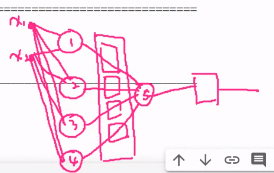


In [ ]:
model4 = Sequential()

model4.add(Dense(units=4, input_dim=2))
model4.add(Activation("sigmoid"))
model4.add(Dense(units=1, input_dim=4))
model4.add(Activation("sigmoid"))

model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4)                 12        
                                                                 
 activation_7 (Activation)   (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
 activation_8 (Activation)   (None, 1)                 0         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


- 입력 * 출력 + 출력 = 특성 수
  - 2 * 4 + 4 = 12
  - 4 * 1 + 1 = 5

- 각 Dense마다 특성 수 구해서 더하면 총 특성 개수 구할 수 있음
  - 12 + 5 = 17

In [ ]:
model4.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [ ]:
model4.fit(X_XOR, y_XOR, batch_size=4, epochs=4000)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 1502/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 1503/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 1504/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 1505/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 1506/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 1507/4000
1/1 [==============================] - 0s 9ms/step - loss: 0.0365 - accuracy: 1.0000
Epoch 1508/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 1.0000
Epoch 1509/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.0365 - accuracy: 1.0000
Epoch 1510/4000
1/1 [==============================] - 0s 10ms/

In [ ]:
X_new = [[1, 0], [1, 1], [0, 0], [0, 1]]
y_new = [1, 0, 0, 1]

pred = model4.predict(X_new)
pred

array([[0.8820315 ],
       [0.06276838],
       [0.06403089],
       [0.9875    ]], dtype=float32)


<table>
  <tr>
    <th></th>
    <th>출력</th>
    <th>Activation</th>
  </tr>
  <tr>
    <td>회귀</td>
    <td>1</td>
    <td>Linear(생략)</td>
  </tr>
  <tr>
    <td>이진분류</td>
    <td>1</td>
    <td>sigmoid</td>
  </tr>
  <tr>
    <td>이진분류</td>
    <td>2 (one-hot 인코딩)</td>
    <td>softmax</td>
  </tr>
  <tr>
    <td>다진분류</td>
    <td>n (one-hot 인코딩)</td>
    <td>softmax</td>
  </tr>
</table>
- one-hot인코딩에는 softmax

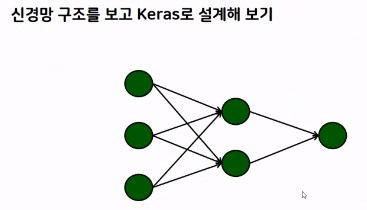
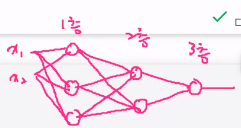

- 1층 퍼셉트론 수 : 3 
- 2층 퍼셉트론 수 : 2
- 3층 퍼셉트론 수 : 1 


# [실습] 6개 퍼셉트론이 3층으로 구성된 신경 설계

In [ ]:
model5 = Sequential()

# 입력층
model5.add(Dense(units=3, input_dim=2, activation="sigmoid"))

# 은닉층
model5.add(Dense(units=2, activation="sigmoid"))

# 출력층
model5.add(Dense(units=1, activation="sigmoid"))
model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
 dense_10 (Dense)            (None, 2)                 8         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


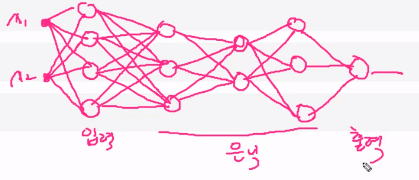

In [ ]:
model6 = Sequential()

# 입력층
model6.add(Dense(units=4, input_dim=2, activation="sigmoid"))

# 은닉층
model6.add(Dense(units=3, activation="sigmoid"))
model6.add(Dense(units=2, activation="sigmoid"))
model6.add(Dense(units=3, activation="sigmoid"))

# 출력층
model6.add(Dense(units=1, activation="sigmoid"))

model6.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 12        
                                                                 
 dense_13 (Dense)            (None, 3)                 15        
                                                                 
 dense_14 (Dense)            (None, 2)                 8         
                                                                 
 dense_15 (Dense)            (None, 3)                 9         
                                                                 
 dense_16 (Dense)            (None, 1)                 4         
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


# 신경망에 층을 쌓는 방법들

- 디코딩 방식 : 퍼셉트론을 점점 늘려가는 방식 (특성 추출)

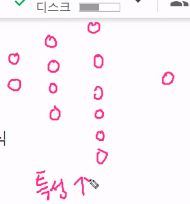
- 인코딩 방식 : 퍼셉트론을 점점 줄여가는 방식 (특성 선택)

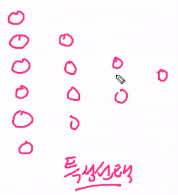
- 리니어 방식 : 퍼셉트론 수를 일정하게 

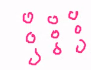

#### 배치하는 방식
- 디코딩 -> 인코딩  : ex) GAN

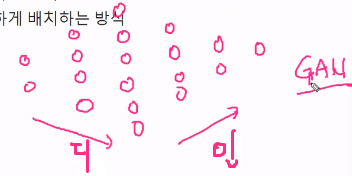
- 인코딩 -> 디코딩
- 리니어 -> 디코딩
- 리니어 -> 인코딩
- 디코딩 -> 리니어
- 인코딩 -> 리니어


# 폐암환자 데이터셋을 이용하여 생존유무 예측하기

- 수치형 데이터 : 폐활량, 호기량, 나이
- 범주형 데이터 : 상태, 통증, 객혈, 호흡, 기침

In [43]:
import pandas as pd

col_name = ["번호", "유형", "폐활량", "호기량", "상태", "통증", "객혈", 
            "호흡", "기침", "약화", "크기", "당뇨", "MI", "PAD", 
            "흡연", "천식", "나이", "생존"]
file_path = "/content/drive/MyDrive/Colab Notebooks/Deep_Learning/data/"
data = pd.read_csv(file_path + "ThoraricSurgery.csv", header=None, index_col=0, names=col_name)

data.head()

# 수치형 컬럼 : 폐활량, 호기량, 나이
# 유형 : 1, 2, 3, 4, 5, 6, 8
# 상태 : 0, 1, 2
# 크기 : 11, 12, 13, 14
# IM (심근경색), PAD (말초동맥경화)

,유형,폐활량,호기량,상태,통증,객혈,호흡,기침,약화,크기,당뇨,MI,PAD,흡연,천식,나이,생존
번호,,,,,,,,,,,,,,,,,
293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [44]:
# 데이터의 구조 및 개수
data.shape

# 데이터 개수 : 470개
# 특성의 수 : 16개 (종양의 유형, 크기, 폐활량, 기침 여부, 흠연 여부 등)

(470, 17)

In [45]:
# 라벨 데이터의 클래스의 수와 클래스별 데이터 갯수
print("라벨 데이터의 클래스 수 : ", data["생존"].unique())
print("라벨 데이터의 클래스별 데이터수 : ", data["생존"].value_counts())
print("유형컬럼 데이터의 클래스 : ", data["유형"].unique())
print("유형컬럼 데이터의 클래스 : ", data["상태"].unique())
print("유형컬럼 데이터의 클래스 : ", data["크기"].unique())

라벨 데이터의 클래스 수 :  [0 1]
라벨 데이터의 클래스별 데이터수 :  0    400
1     70
Name: 생존, dtype: int64
유형컬럼 데이터의 클래스 :  [1 2 3 4 5 6 8]
유형컬럼 데이터의 클래스 :  [0 1 2]
유형컬럼 데이터의 클래스 :  [12 14 11 13]


In [24]:
# 특성 데이터와 라벨데이터로 분리
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

X.shape, y.shape

((470, 16), (470,))

In [26]:
# 시드 설정
import tensorflow as tf
import numpy as np

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [27]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model7 = Sequential()

# 입력층
model7.add(Dense(units=32, input_dim=16, activation="sigmoid"))

# 은닉층
model7.add(Dense(units=64, activation="sigmoid"))
model7.add(Dense(units=128, activation="sigmoid"))
model7.add(Dense(units=64, activation="sigmoid"))
model7.add(Dense(units=32, activation="sigmoid"))
model7.add(Dense(units=16, activation="sigmoid"))
model7.add(Dense(units=8, activation="sigmoid"))
model7.add(Dense(units=4, activation="sigmoid"))

# 출력층
model7.add(Dense(units=1, activation="sigmoid"))

model7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 8)                

In [28]:
model7.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"]
               )

In [29]:
model7.fit(X, y, epochs=500, batch_size=10)

Epoch 1/500
47/47 [==============================] - 3s 3ms/step - loss: 0.6360 - accuracy: 0.8511
Epoch 2/500
47/47 [==============================] - 0s 3ms/step - loss: 0.5666 - accuracy: 0.8511
Epoch 3/500
47/47 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.8511
Epoch 4/500
47/47 [==============================] - 0s 3ms/step - loss: 0.4941 - accuracy: 0.8511
Epoch 5/500
47/47 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.8511
Epoch 6/500
47/47 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.8511
Epoch 7/500
47/47 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.8511
Epoch 8/500
47/47 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.8511
Epoch 9/500
47/47 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.8511
Epoch 10/500
47/47 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8511
Epoch 11/

# 모델 평가
- evaluate(특성, 라벨) : 오차와 정확도 반환

In [31]:
# 모델 평가 : 오차, 정확도 반환
model7.evaluate(X,y)

15/15 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8511


[0.42086002230644226, 0.8510638475418091]

In [32]:
# 예측
y_pred = model7.predict(X)

for i in range(1,10):
  print(y_pred[i])

[0.14934051]
[0.14934051]
[0.14934051]
[0.14934051]
[0.14934051]
[0.14934051]
[0.14934051]
[0.14934051]
[0.14934051]


# 라벨을 원핫인코딩한 데이터를 학습
- 출력층의 units를 라벨의 클래스 수와 동일하게 설정
- 출력층의 activation를 softmax로 설정

In [30]:
import pandas as pd

# y를 원핫인코딩
y_en =pd.get_dummies(y)
y_en.shape

(470, 2)

In [47]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model8 = Sequential()

#입력층
model8.add(Dense(units=32, input_dim=16, activation="sigmoid"))

#은닉층
model8.add(Dense(units=64, activation="sigmoid"))
model8.add(Dense(units=32, activation="sigmoid"))
model8.add(Dense(units=16, activation="sigmoid"))

#출력층
# 라벨을 원핫인코딩 한 경우에는 units을 라벨의 클래스 수로 설정하고
# activation은 softmax로 설정
model8.add(Dense(units=2, activation="softmax"))
model8.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                544       
                                                                 
 dense_29 (Dense)            (None, 64)                2112      
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dense_32 (Dense)            (None, 2)                 34        
                                                                 
Total params: 5,298
Trainable params: 5,298
Non-trainable params: 0
_________________________________________________________________


In [48]:
model8.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"]
               )

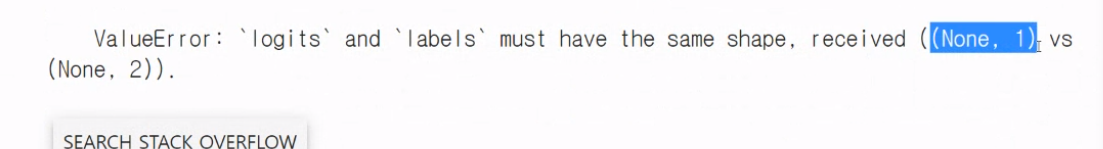

- 자주 발생하는 오류 : 출력값과 입력값이 달라서 발생한 오류

In [40]:
# 예측
y_pred = model8.predict(X)

for i in range(1, 10) :
  print(y_pred[i])

[0.8368841  0.16311589]
[0.83688414 0.16311584]
[0.836884 0.163116]
[0.8368841  0.16311589]
[0.8368841  0.16311593]
[0.8368841  0.16311596]
[0.8368841  0.16311589]
[0.83688414 0.16311584]
[0.83688414 0.16311584]


# wine 데이터 셋을 활용한 회귀/ 분류 학습

In [164]:
# 데이터 로드
wine = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_Learning/data/wine.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [165]:
wine.shape

(6497, 13)

In [166]:
print("wine quality :",wine["quality"].unique())
print("wine type :",wine['type'].unique())

wine quality : [5 6 7 4 8 3 9]
wine type : [1 0]


# 회귀분석

In [204]:
# 내 방법
# print(wine.columns) 해서 복.붙하기
# X = wine.loc[:, ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#        'pH', 'sulphates', 'quality', 'type']]
# y = wine["alcohol"]
# 경준님 방법
X = wine.loc[:,].drop("alcohol", axis=1)
y = wine["alcohol"]

# 선생님 방법
# y = wine["alcohol"]
# del wine["alcohol"]
# X = wine

# X.shape, y.shape

In [168]:
print(X.head())
print(y.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   quality  type  
0        5     1  
1        5     1  
2        5     1  
3        6

In [169]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model9 = Sequential()

model9.add(Dense(units=24, input_dim=12, activation="sigmoid"))

model9.add(Dense(units=48, activation="sigmoid"))
model9.add(Dense(units=24, activation="sigmoid"))

# 회귀인 경우 units는 1로 activation은 linear을 쓰거나 activation을 설정하지 않음
# model9.add(Dense(units=1, activation="linear"))
model9.add(Dense(units=1))

model9.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 24)                312       
                                                                 
 dense_50 (Dense)            (None, 48)                1200      
                                                                 
 dense_51 (Dense)            (None, 24)                1176      
                                                                 
 dense_52 (Dense)            (None, 1)                 25        
                                                                 
Total params: 2,713
Trainable params: 2,713
Non-trainable params: 0
_________________________________________________________________


In [170]:
# 회귀인 경우 loss는 mse, metrics는 설정하지 않음
model9.compile(loss="mse", optimizer="adam")

In [171]:
h9 = model9.fit(X, y, batch_size=100, epochs=100)

Epoch 1/100
65/65 [==============================] - 1s 3ms/step - loss: 79.2909
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 44.4019
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 30.3309
Epoch 4/100
65/65 [==============================] - 0s 3ms/step - loss: 22.2215
Epoch 5/100
65/65 [==============================] - 0s 3ms/step - loss: 16.3340
Epoch 6/100
65/65 [==============================] - 0s 3ms/step - loss: 11.9376
Epoch 7/100
65/65 [==============================] - 0s 3ms/step - loss: 8.6759
Epoch 8/100
65/65 [==============================] - 0s 3ms/step - loss: 6.2615
Epoch 9/100
65/65 [==============================] - 0s 3ms/step - loss: 4.4095
Epoch 10/100
65/65 [==============================] - 0s 3ms/step - loss: 3.1698
Epoch 11/100
65/65 [==============================] - 0s 3ms/step - loss: 2.4125
Epoch 12/100
65/65 [==============================] - 0s 2ms/step - loss: 1.9652
Epoch 13/100
65/65 [===========

In [172]:
model9.evaluate(X,y)

204/204 [==============================] - 0s 2ms/step - loss: 0.8109


0.8109251260757446

# 결과 시각화하기

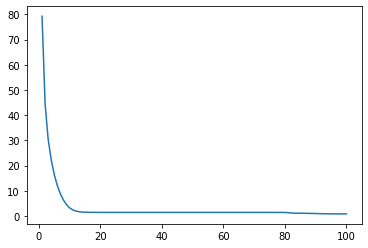

In [173]:
import matplotlib.pyplot as plt

# 학습 결과에서 loss 값들을 가져온다.
loss = h9.history["loss"]

# 반복수
xaxis = range(1, len(loss) + 1)

plt.plot(xaxis, loss)

# 훈련 데이터와 테스트 데이터로 분리

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872, 1), (1625, 1))

In [175]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model10 = Sequential()

model10.add(Dense(units=24, input_dim=12, activation="sigmoid"))

model10.add(Dense(units=48, activation="sigmoid"))
model10.add(Dense(units=24, activation="sigmoid"))

# 회귀인 경우 units는 1로 activation은 linear을 쓰거나 activation을 설정하지 않음
# model10.add(Dense(units=1, activation="linear"))
model10.add(Dense(units=1))

model10.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 24)                312       
                                                                 
 dense_54 (Dense)            (None, 48)                1200      
                                                                 
 dense_55 (Dense)            (None, 24)                1176      
                                                                 
 dense_56 (Dense)            (None, 1)                 25        
                                                                 
Total params: 2,713
Trainable params: 2,713
Non-trainable params: 0
_________________________________________________________________


In [176]:
model10.compile(loss="mse", optimizer="adam")

In [177]:
h10 = model10.fit(X_train, y_train, batch_size=100, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
49/49 [==============================] - 1s 7ms/step - loss: 81.3978 - val_loss: 59.8041
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 47.3420 - val_loss: 37.5720
Epoch 3/100
49/49 [==============================] - 0s 3ms/step - loss: 32.0266 - val_loss: 26.8162
Epoch 4/100
49/49 [==============================] - 0s 4ms/step - loss: 23.4329 - val_loss: 20.0765
Epoch 5/100
49/49 [==============================] - 0s 4ms/step - loss: 17.5653 - val_loss: 15.0281
Epoch 6/100
49/49 [==============================] - 0s 4ms/step - loss: 13.1185 - val_loss: 11.1825
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: 9.7320 - val_loss: 8.2533
Epoch 8/100
49/49 [==============================] - 0s 4ms/step - loss: 7.0657 - val_loss: 5.8697
Epoch 9/100
49/49 [==============================] - 0s 4ms/step - loss: 5.0018 - val_loss: 4.2061
Epoch 10/100
49/49 [==============================] - 0s 4ms/step - loss: 3.6338 - val_loss: 3.12

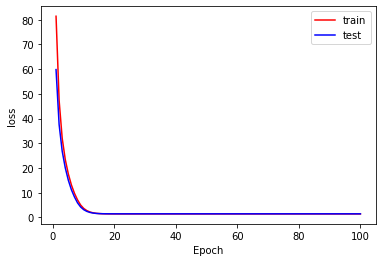

In [178]:
import matplotlib.pyplot as plt

# 학습 결과에서 loss값들을 가져온다
loss = h10.history["loss"]
val_loss = h10.history["val_loss"]

# 반복수
xaxis = range(1, len(loss) + 1)

plt.plot(xaxis, loss, "r", label="train")
plt.plot(xaxis, val_loss, "b", label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

# 다진분류

In [228]:
# 라벨 값을 quality 컬럼 사용
X = wine.loc[:,].drop("quality", axis=1)
y = wine["quality"]
print("wine quality :",y.unique())

# y를 원핫인코딩
y_en = pd.get_dummies(y)
y_en.shape

wine quality : [5 6 7 4 8 3 9]


(6497, 7)

In [229]:
# 훈련 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_en, random_state = 0 )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4872, 12), (4872, 7), (1625, 12), (1625, 7))

In [230]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model11 = Sequential()

model11.add(Dense(units=24, input_dim=12, activation="sigmoid"))

model11.add(Dense(units=48, activation="sigmoid"))
model11.add(Dense(units=24, activation="sigmoid"))

# 회귀인 경우 units는 1로 activation은 linear을 쓰거나 activation을 설정하지 않음
# model10.add(Dense(units=1, activation="linear"))
model11.add(Dense(units=7, activation="softmax"))

model11.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 24)                312       
                                                                 
 dense_74 (Dense)            (None, 48)                1200      
                                                                 
 dense_75 (Dense)            (None, 24)                1176      
                                                                 
 dense_76 (Dense)            (None, 7)                 175       
                                                                 
Total params: 2,863
Trainable params: 2,863
Non-trainable params: 0
_________________________________________________________________


In [231]:
model11.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [232]:
h11 = model11.fit(X_train, y_train, batch_size=100, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
49/49 [==============================] - 1s 7ms/step - loss: 1.7379 - accuracy: 0.3555 - val_loss: 1.4416 - val_accuracy: 0.4332
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 1.3545 - accuracy: 0.4376 - val_loss: 1.3237 - val_accuracy: 0.4332
Epoch 3/100
49/49 [==============================] - 0s 4ms/step - loss: 1.2957 - accuracy: 0.4376 - val_loss: 1.3008 - val_accuracy: 0.4332
Epoch 4/100
49/49 [==============================] - 0s 4ms/step - loss: 1.2826 - accuracy: 0.4376 - val_loss: 1.2949 - val_accuracy: 0.4332
Epoch 5/100
49/49 [==============================] - 0s 4ms/step - loss: 1.2778 - accuracy: 0.4376 - val_loss: 1.2925 - val_accuracy: 0.4332
Epoch 6/100
49/49 [==============================] - 0s 5ms/step - loss: 1.2747 - accuracy: 0.4376 - val_loss: 1.2909 - val_accuracy: 0.4332
Epoch 7/100
49/49 [==============================] - 0s 4ms/step - loss: 1.2730 - accuracy: 0.4376 - val_loss: 1.2915 - val_accuracy: 0.4332
Epoch 8/100
4

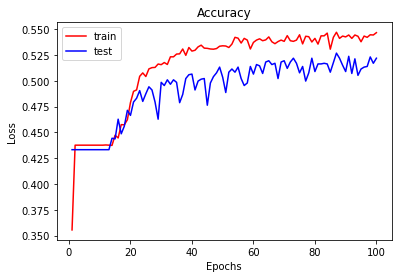

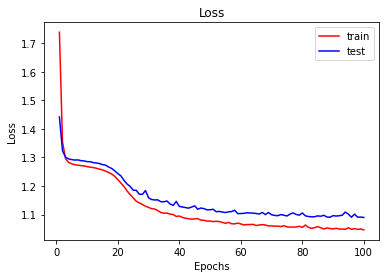

In [233]:
import matplotlib.pyplot as plt

acc = h11.history["accuracy"]
val_acc = h11.history["val_accuracy"]
loss = h11.history["loss"]
val_loss = h11.history["val_loss"]

# 반복수
x_axis = range(1, len(loss) + 1)

# 정확도
plt.plot(xaxis, acc, "r", label="train")
plt.plot(xaxis, val_acc, "b", label="test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Accuracy")
plt.show()

# 오차
plt.plot(xaxis, loss, "r", label="train")
plt.plot(xaxis, val_loss, "b", label="test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.show()

# [실습] 회귀분석 - 보스턴 집값 분석

In [292]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [293]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model12 = Sequential()

model12.add(Dense(units=30, input_dim=13, activation="sigmoid"))

model12.add(Dense(units=50, activation="sigmoid"))
model12.add(Dense(units=30, activation="sigmoid"))
model12.add(Dense(units=10, activation="sigmoid"))

model12.add(Dense(units=1))

model12.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 30)                420       
                                                                 
 dense_126 (Dense)           (None, 50)                1550      
                                                                 
 dense_127 (Dense)           (None, 30)                1530      
                                                                 
 dense_128 (Dense)           (None, 10)                310       
                                                                 
 dense_129 (Dense)           (None, 1)                 11        
                                                                 
Total params: 3,821
Trainable params: 3,821
Non-trainable params: 0
_________________________________________________________________


In [294]:
model12.compile(loss="mse", optimizer="adam")

In [295]:
h12 = model12.fit(X_train, y_train, batch_size=100, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
5/5 [==============================] - 1s 36ms/step - loss: 610.1426 - val_loss: 635.7737
Epoch 2/1000
5/5 [==============================] - 0s 8ms/step - loss: 603.4777 - val_loss: 629.0196
Epoch 3/1000
5/5 [==============================] - 0s 8ms/step - loss: 596.9653 - val_loss: 622.4045
Epoch 4/1000
5/5 [==============================] - 0s 8ms/step - loss: 590.6417 - val_loss: 616.0739
Epoch 5/1000
5/5 [==============================] - 0s 8ms/step - loss: 584.5712 - val_loss: 609.9733
Epoch 6/1000
5/5 [==============================] - 0s 8ms/step - loss: 578.6936 - val_loss: 604.1524
Epoch 7/1000
5/5 [==============================] - 0s 8ms/step - loss: 573.1218 - val_loss: 598.5873
Epoch 8/1000
5/5 [==============================] - 0s 8ms/step - loss: 567.8351 - val_loss: 593.3623
Epoch 9/1000
5/5 [==============================] - 0s 8ms/step - loss: 562.8431 - val_loss: 588.5866
Epoch 10/1000
5/5 [==============================] - 0s 10ms/step - loss: 558.328

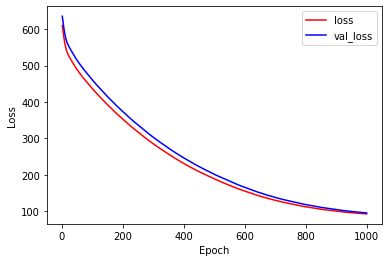

In [298]:
loss = h12.history["loss"]
val_loss = h12.history["val_loss"]

xaxis=range(1, len(loss)+1)

plt.plot(xaxis, loss, "r", label="loss")
plt.plot(xaxis, val_loss, "b", label="val_loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# [실습] 이진 분류

In [72]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=["target"])
# y.replace({0:'malignant', 1:'benign'}, inplace=True)
X.shape, y.shape

((569, 30), (569, 1))

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model13 = Sequential()

model13.add(Dense(units=40, input_dim=30, activation = "sigmoid"))

model13.add(Dense(units=60, activation = "sigmoid"))
model13.add(Dense(units=40, activation = "sigmoid"))
model13.add(Dense(units=20, activation = "sigmoid"))
model13.add(Dense(units=10, activation = "sigmoid"))

model13.add(Dense(units=1, activation = "sigmoid"))

In [75]:
model13.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [76]:
h13 = model13.fit(X_train, y_train, batch_size=100, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
5/5 [==============================] - 1s 47ms/step - loss: 0.8908 - accuracy: 0.3732 - val_loss: 0.8639 - val_accuracy: 0.3706
Epoch 2/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.8481 - accuracy: 0.3732 - val_loss: 0.8241 - val_accuracy: 0.3706
Epoch 3/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.8093 - accuracy: 0.3732 - val_loss: 0.7890 - val_accuracy: 0.3706
Epoch 4/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.7773 - accuracy: 0.3732 - val_loss: 0.7587 - val_accuracy: 0.3706
Epoch 5/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.7490 - accuracy: 0.3732 - val_loss: 0.7336 - val_accuracy: 0.3706
Epoch 6/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.7258 - accuracy: 0.3732 - val_loss: 0.7137 - val_accuracy: 0.3706
Epoch 7/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.7077 - accuracy: 0.3732 - val_loss: 0.6982 - val_accuracy: 0.3706
Epoch 8/1000
5/

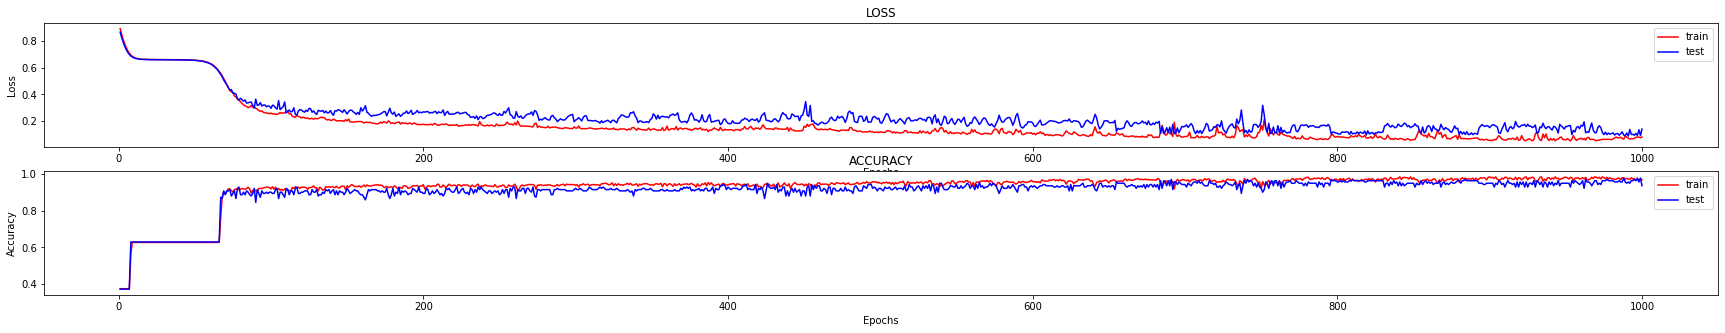

In [77]:
import matplotlib.pyplot as plt

loss = h13.history["loss"]
val_loss = h13.history["val_loss"]

acc = h13.history["accuracy"]
val_acc = h13.history["val_accuracy"]

xaxis = range(1, len(loss) + 1)


plt.figure(figsize=(30,10))
plt.subplot(2, 1, 1)
plt.plot(xaxis, loss, "r", label="train")
plt.plot(xaxis, val_loss, "b", label="test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.plot(xaxis, acc, "r", label="train")
plt.plot(xaxis, val_acc, "b", label="test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("ACCURACY")
plt.show()

# 다진 분류

In [96]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["target"])
y_enc = pd.get_dummies(y)
# y.replace({0:'setosa', 1:'versicolor', 2:'virginica'})
y_enc.shape

(150, 1)

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_en, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112, 1), (38, 1))

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model14 = Sequential()

model14.add(Dense(units=20, input_dim=4, activations="sigmoid"))

model14.add(Dense(units=40, activations="sigmoid"))
model14.add(Dense(units=30, activations="sigmoid"))
model14.add(Dense(units=10, activations="sigmoid"))

model14.add(Dense(units=3, activations="softmax"))

model14.summary()

TypeError: ignored

In [ ]:
model14.compile(loss="categorical_entropy",
                optimizer="adam",
                metrics=["accuracy"])

In [ ]:
h14 = model14.fit(X_train, y_train, batch_size=100, epochs=100, validation_data=(X_train, y_train))

In [ ]:
import matplotlib.pyplot as plt

loss = h14.history["loss"]
val_loss = h14.history["val_loss"]

acc = h14.history["accuracy"]
val_acc = h14.history["val_history"]

xaxis = range(1, len(loss) + 1)

plt.figure(fisize=(30,10))
plt.subplot(2, 1, 1)
plt.plot(xaxis, loss, "r", label="train")
plt.plot(xaxis, va_loss, "b", label="test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.plot(xaxis, acc, "r", label="train")
plt.plot(xaxis, va_acc, "b", label="test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("ACCURACY")

plt.show()